<a href="https://colab.research.google.com/github/Alan-Hans/Portafolio-DataScientist/blob/main/SQL_exersice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook we going to developed some exersices from an interview test.
For this purpose we have this table, and the objective is to obtained the sentences in SQL.
<br> The table is in spanish language, the questions are the following:
<br>1.- Summary of sales group by month.
<br>2.- Summary of sales group by seller.
<br>3.- Country´s with summary of sales less than 1000000.
<br>4.- Sellers without sales.
<br>5.- Sales do from people´s from eeuu during march 2022.
<br>6.- Sales do from womans in summary more than 5000000
<br>7.- Create a temporal table with the information from Ventas TABLE and then select sales from man, from sudamerica. 


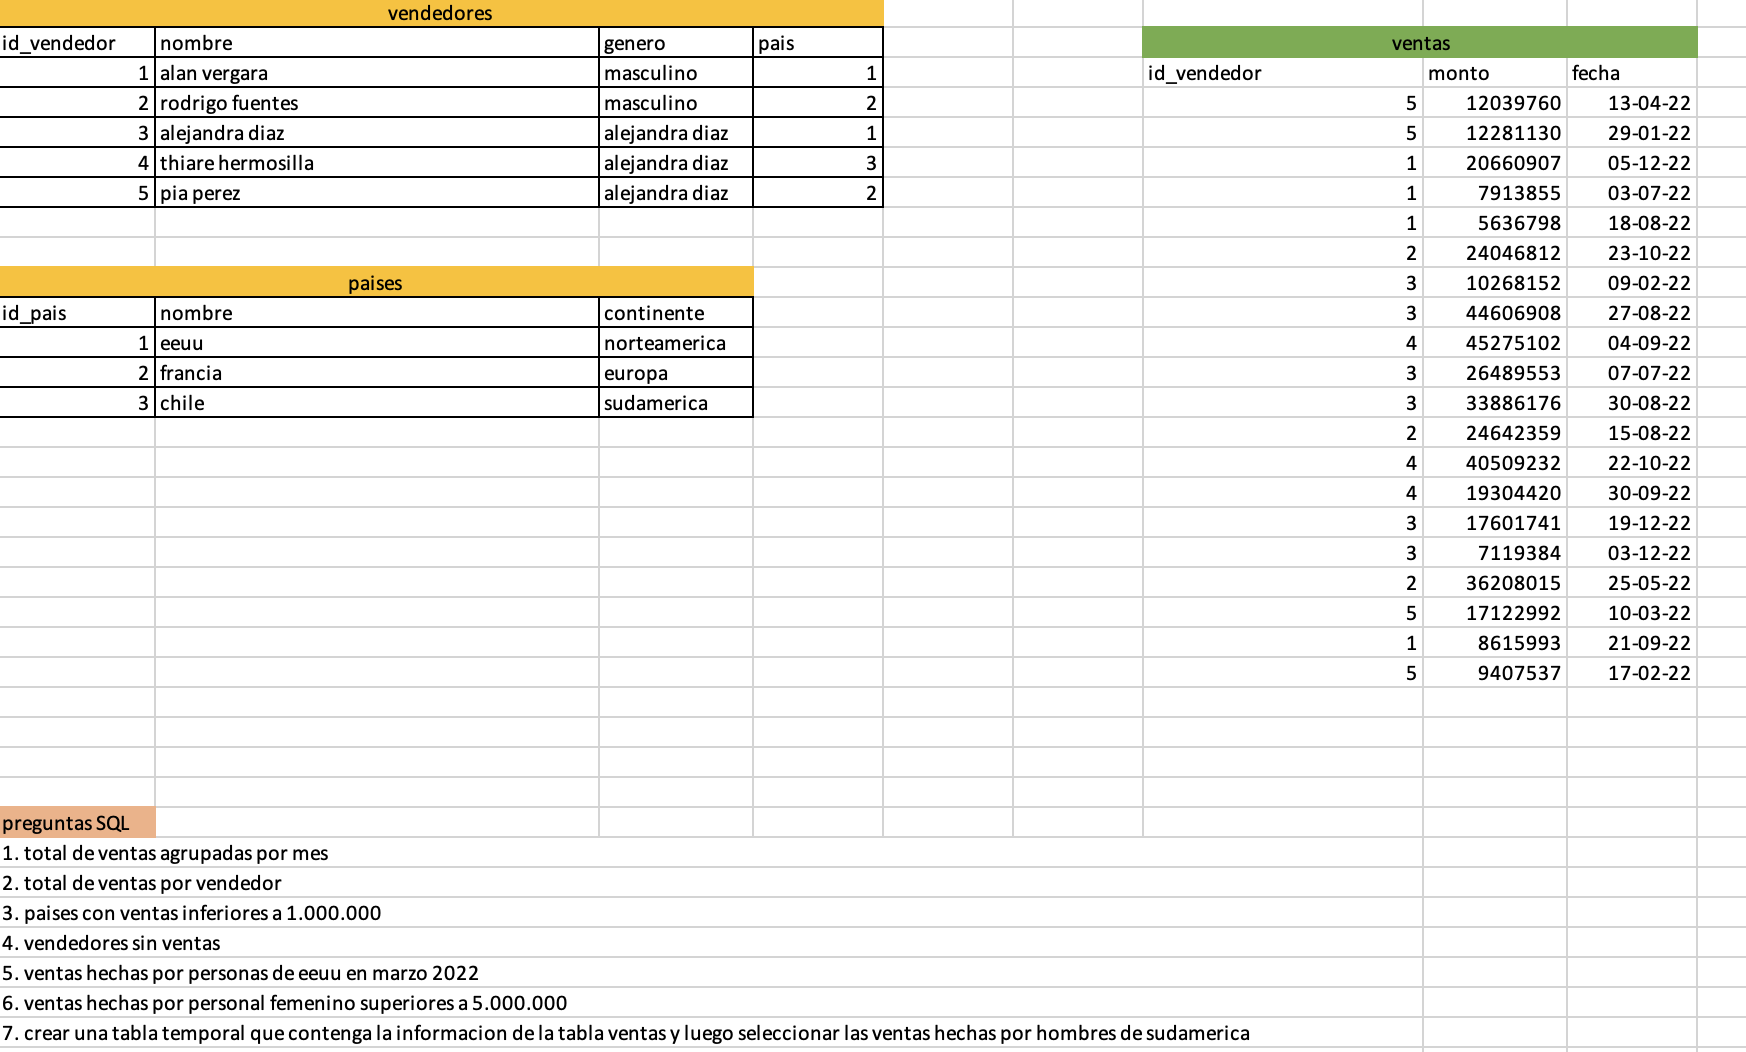

In [ ]:
1.- 
SELECT date_part('year', ventas.fecha) AS anio,
	     date_part('month', ventas.fecha) AS mes,
	     SUM (monto) AS total_ventas
FROM platzi.ventas
GROUP BY anio,mes
ORDER BY mes


In [ ]:
2.-
SELECT 	vendedores.nombre , SUM(monto) AS total_ventas
FROM platzi.ventas
INNER JOIN platzi.vendedores ON vendedores.id_vendedor = ventas.id_vendedor
GROUP BY vendedores.nombre
ORDER BY total_ventas

In [ ]:
3.-
SELECT * 
FROM (
SELECT c.pais, SUM(monto) AS total_ventas
FROM platzi.ventas as a
INNER JOIN platzi.vendedores AS b
ON a.id_vendedor = b.id_vendedor
INNER JOIN platzi.paises as c
ON c.id_pais = b.pais
GROUP BY c.pais
) as pete
WHERE total_ventas < 100000


In [ ]:
4.-
SELECT * 
FROM (
SELECT 	vendedores.nombre , SUM(monto) AS total_ventas
FROM platzi.ventas
INNER JOIN platzi.vendedores ON vendedores.id_vendedor = ventas.id_vendedor
GROUP BY vendedores.nombre
) as pete
WHERE total_ventas = 0 OR total_ventas is NULL

In [ ]:
5.-
SELECT * 
FROM (
SELECT c.pais AS name_pais, SUM(monto) AS total_ventas, date_part('month', a.fecha) AS mes
FROM platzi.ventas AS a
INNER JOIN platzi.vendedores AS b
ON a.id_vendedor = b.id_vendedor
INNER JOIN platzi.paises AS c
ON c.id_pais = b.pais
GROUP BY name_pais, mes
) AS pete
WHERE mes =3 and name_pais = 'eeuu'

In [ ]:
6.-
SELECT * 
FROM (
SELECT b.nombre , a.monto as monto_venta , b.genero as genero, date_part('month', a.fecha) AS mes 
FROM platzi.ventas AS a
INNER JOIN platzi.vendedores AS b
ON a.id_vendedor = b.id_vendedor
GROUP BY b.nombre, a.monto, mes, b.genero
) AS pete
WHERE genero != 'masculino' AND monto_venta > 5000000

In [ ]:
7.-
CREATE TEMP TABLE ventas_tempo(id_vendedor int, monto int, fecha Date);
SELECT * FROM ventas_tempo;

INSERT INTO ventas_tempo
SELECT id_vendedor, monto, fecha 
  FROM platzi.ventas


SELECT * 
FROM (
SELECT b.nombre , a.monto as monto_venta , b.genero as genero, c.continente as continente, date_part('month', a.fecha) AS mes 
FROM ventas_tempo AS a
INNER JOIN platzi.vendedores AS b
ON a.id_vendedor = b.id_vendedor
INNER JOIN platzi.paises AS c
ON c.id_pais = b.pais
GROUP BY b.nombre, a.monto, mes, b.genero, continente
) AS pete
WHERE genero = 'masculino' AND continente = 'sudamerica'